In [13]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
# Load Android Data
data_source = 'android_data'
data_type = 'wlk'
data_num = '1'
data_url = '../data/' + data_source + '/' + data_type + '/' + data_type + '_' + data_num + '.csv'

data = pd.read_csv(data_url, sep=';')
data = data.drop(columns=['id'])

In [15]:
# Load Orignal Data
data_source_o = 'dataset'
data_type_o = 'wlk_7'
data_num_o = '1'
data_url_o = '../data/' + data_source_o + '/' + data_type_o + '/' + 'sub_' + data_num_o + '.csv'

data_o = pd.read_csv(data_url_o)
data_o = data_o.drop(data_o.columns[0], axis=1)

In [16]:
data.head()

,Attitude Roll,Attitude Pitch,Attitude Azimuth,Gravity X,Gravity Y,Gravity Z,Rotation Rate X,Rotation Rate Y,Rotation Rate Z,User Acceleration X,User Acceleration Z,User Acceleration Y
0,-2.991125,3.131489,1.636644,0.122628,-0.162232,9.804542,-0.000370,0.003825,0.004419,-0.446335,0.937147,0.901209
1,-2.985419,3.123636,1.631776,0.174307,-0.264800,9.801524,0.000504,0.000858,-0.003205,-0.423006,0.977353,0.917111
2,-2.985419,3.123636,1.631776,0.174307,-0.264800,9.801524,0.000504,0.000858,-0.003205,-0.423006,0.977353,0.917111
3,-2.985419,3.123636,1.631776,0.174307,-0.264800,9.801524,0.000504,0.000858,-0.003205,-0.423006,0.977353,0.917111
4,-2.985419,3.123636,1.631776,0.174307,-0.264800,9.801524,0.000504,0.000858,-0.003205,-0.423006,0.977353,0.917111


In [17]:
data_o.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,-1.711140,-1.429168,-2.591433,-0.139767,0.989987,0.019745,-0.350593,-0.511691,-0.865217,0.091702,0.415881,0.093689
1,-1.787917,-1.414171,-2.630956,-0.152324,0.987759,0.033602,-0.550553,-2.243217,-0.582409,0.367412,0.004566,-0.106082
2,-1.897323,-1.399331,-2.706668,-0.161610,0.985336,0.054729,-0.931014,-1.358033,-0.503947,0.172093,-0.217483,-0.163387
3,-2.018375,-1.383279,-2.813421,-0.168058,0.982470,0.080680,-1.304668,-0.541368,-0.346302,0.004957,-0.237566,-0.019080
4,-2.124395,-1.364054,-2.913092,-0.174613,0.978705,0.107922,-1.278349,-0.434722,-0.398598,-0.040292,-0.241461,0.015201


In [18]:
# Convert string with exponent to float64 of data2
def convert_str_to_float(data):
    for column in data.columns:
        if data[column].dtype != 'float64':
            data[column] = data[column].apply(lambda x: float(x.lower().replace(',', '.')))
    return data

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Attitude Roll        1279 non-null   float64
 1   Attitude Pitch       1279 non-null   float64
 2   Attitude Azimuth     1279 non-null   float64
 3   Gravity X            1279 non-null   float64
 4   Gravity Y            1279 non-null   float64
 5   Gravity Z            1279 non-null   float64
 6   Rotation Rate X      1279 non-null   float64
 7   Rotation Rate Y      1279 non-null   float64
 8   Rotation Rate Z      1279 non-null   float64
 9   User Acceleration X  1279 non-null   float64
 10  User Acceleration Z  1279 non-null   float64
 11  User Acceleration Y  1279 non-null   float64
dtypes: float64(12)
memory usage: 120.0 KB


In [20]:
data_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5439 entries, 0 to 5438
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attitude.roll       5439 non-null   float64
 1   attitude.pitch      5439 non-null   float64
 2   attitude.yaw        5439 non-null   float64
 3   gravity.x           5439 non-null   float64
 4   gravity.y           5439 non-null   float64
 5   gravity.z           5439 non-null   float64
 6   rotationRate.x      5439 non-null   float64
 7   rotationRate.y      5439 non-null   float64
 8   rotationRate.z      5439 non-null   float64
 9   userAcceleration.x  5439 non-null   float64
 10  userAcceleration.y  5439 non-null   float64
 11  userAcceleration.z  5439 non-null   float64
dtypes: float64(12)
memory usage: 510.0 KB


In [21]:
# Check max values of each column on both datasets
data1_max = data.max()
data1_min = data.min()
data2_max = data_o.max()
data2_min = data_o.min()

print('Max values of data1: \n', data1_max)
print('Max values of data2: \n', data2_max)
print('Min values of data1: \n', data1_min)
print('Min values of data2: \n', data2_min)

Max values of data1: 
 Attitude Roll          3.129452
Attitude Pitch         3.131489
Attitude Azimuth       3.102267
Gravity X              4.807256
Gravity Y             -0.162232
Gravity Z              9.804542
Rotation Rate X        0.623308
Rotation Rate Y        0.405377
Rotation Rate Z        0.129732
User Acceleration X    0.425163
User Acceleration Z    0.989788
User Acceleration Y    0.917111
dtype: float64
Max values of data2: 
 attitude.roll         3.141394
attitude.pitch       -0.099584
attitude.yaw          3.141574
gravity.x             0.541857
gravity.y             0.999682
gravity.z             0.965369
rotationRate.x        3.992349
rotationRate.y        6.219758
rotationRate.z        2.553955
userAcceleration.x    1.968308
userAcceleration.y    2.652070
userAcceleration.z    1.233749
dtype: float64
Min values of data1: 
 Attitude Roll         -3.140596
Attitude Pitch         0.573719
Attitude Azimuth      -3.114146
Gravity X              0.122628
Gravity Y        

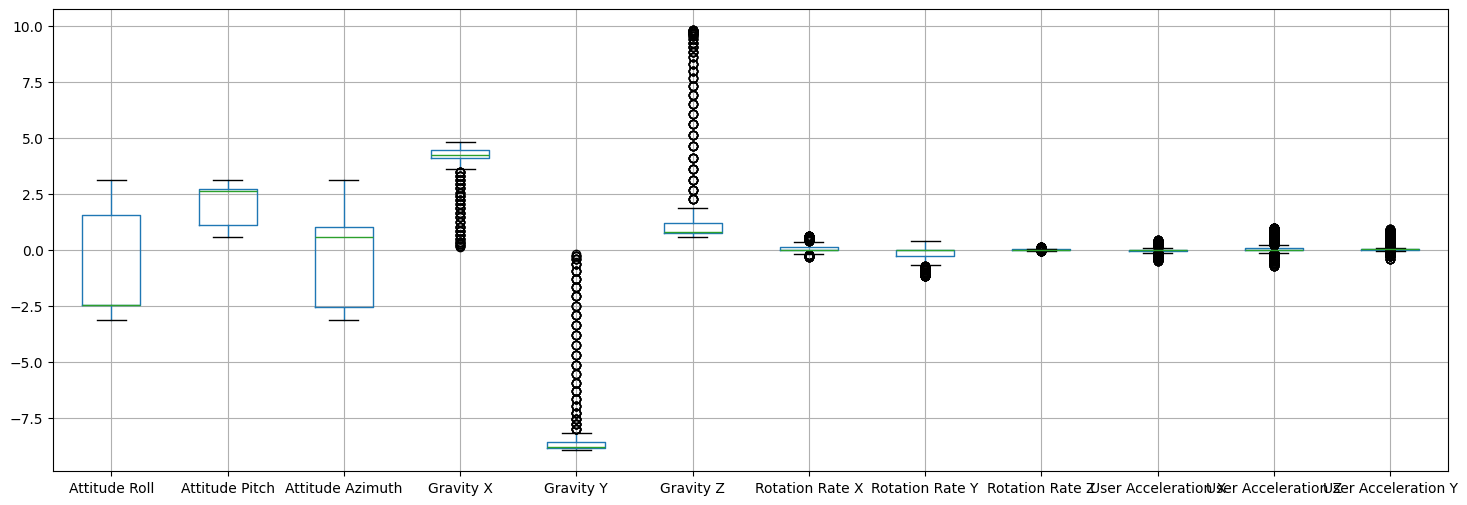

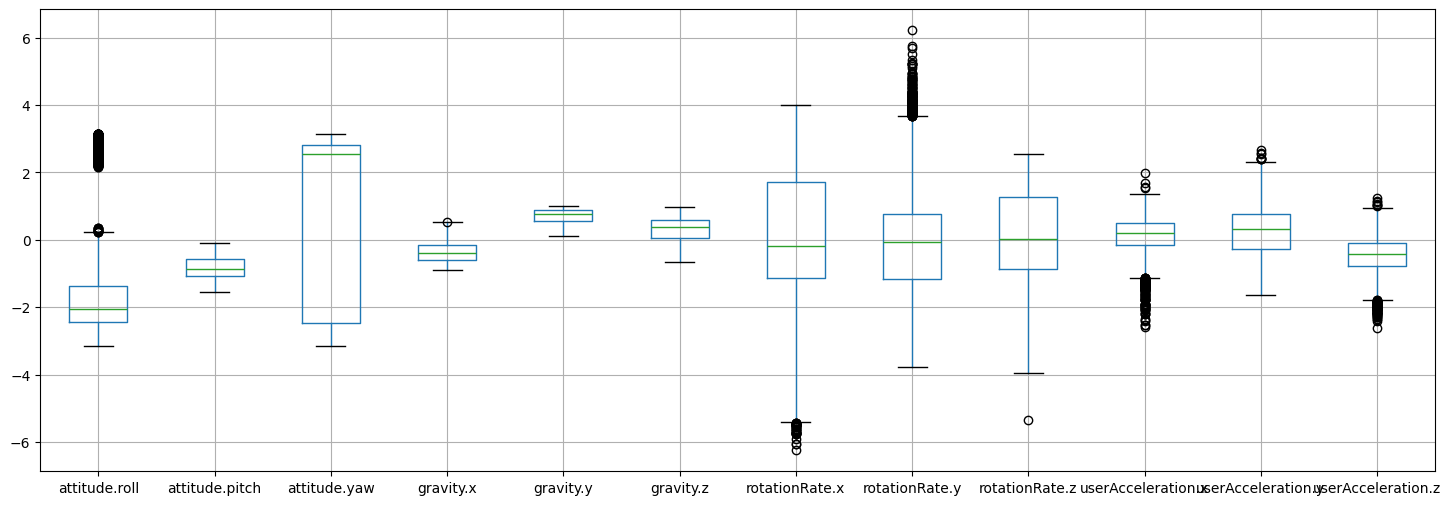

In [22]:
# clone the data1 and data2
data_clone = data.copy()
data_o_clone = data_o.copy()

# boxplot
plt.figure(figsize=(18, 6)) 
data_clone.boxplot()
plt.show()

plt.figure(figsize=(18, 6)) 
data_o_clone.boxplot()
plt.show()

In [11]:
def remove_outliers(df):
    # Calculate IQR for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_out = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    
    return df_out


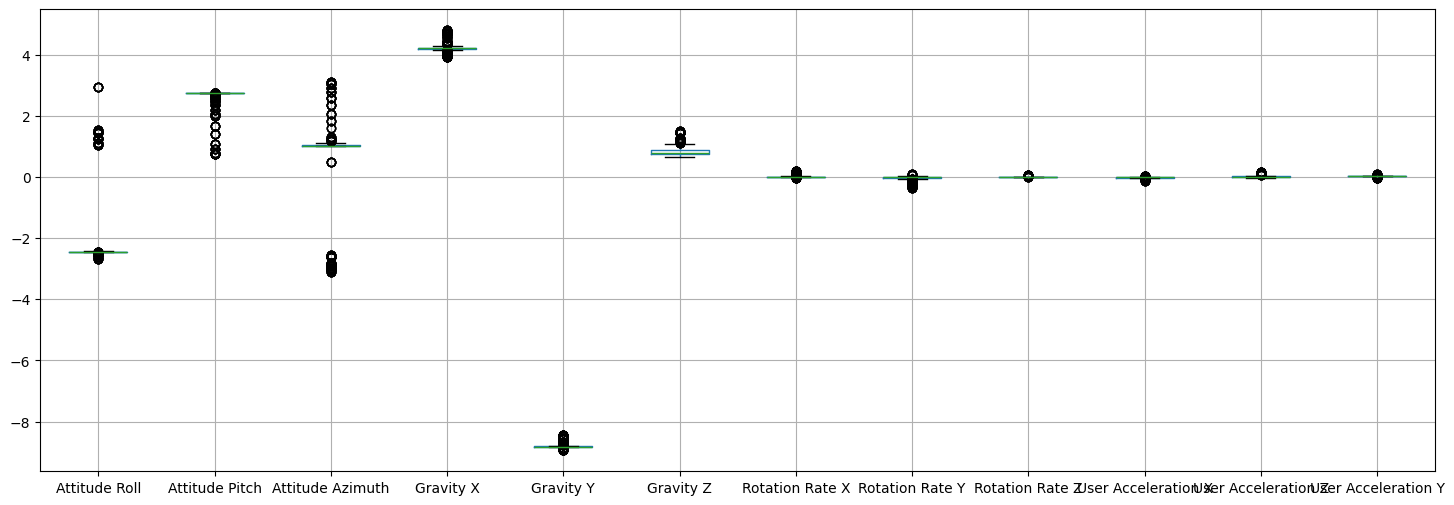

In [12]:
# Use the function to remove outliers
data = remove_outliers(data)

# boxplot
plt.figure(figsize=(18, 6))
data.boxplot()
plt.show()

In [23]:
# multiply data1 with constant to fit data2
def fit_data(data1_means, data2_means):
    constants = []
    for i in range(len(data1_means)):
        constants.append(data2_means[i] / data1_means[i])
    return constants

In [24]:
# find mean of each column without id
data_mean = data.mean()
data_o_mean = data_o.mean()

# print mean of each column
print('Data Mean:\n', data_mean)
print('Data Original Mean:\n',data_o_mean)

Data Mean:
 Attitude Roll         -0.556810
Attitude Pitch         2.018197
Attitude Azimuth       0.000100
Gravity X              4.106354
Gravity Y             -8.348277
Gravity Z              1.568869
Rotation Rate X        0.059865
Rotation Rate Y       -0.110721
Rotation Rate Z        0.013135
User Acceleration X   -0.011293
User Acceleration Z    0.060791
User Acceleration Y    0.070897
dtype: float64
Data Original Mean:
 attitude.roll        -1.470524
attitude.pitch       -0.830624
attitude.yaw          0.716812
gravity.x            -0.362365
gravity.y             0.702236
gravity.z             0.340555
rotationRate.x       -0.042080
rotationRate.y        0.025943
rotationRate.z        0.104712
userAcceleration.x    0.138575
userAcceleration.y    0.291134
userAcceleration.z   -0.435232
dtype: float64


In [25]:
constants = fit_data(data_mean, data_o_mean)
print(constants)

[2.6409777002540924, -0.41156736256954746, 7187.328652729532, -0.0882449317463308, -0.0841174355840252, 0.2170705944672779, -0.7029087774414849, -0.2343149572653462, 7.972150743168296, -12.270383264885496, 4.789099995152412, -6.1389608658644805]


C:\Users\rayha\AppData\Local\Temp\ipykernel_17132\4027147284.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  constants.append(data2_means[i] / data1_means[i])


In [174]:
# c sit
csit = [-3.4514602950238413, 1.5113482974975188, 0.04506911694138332, 0.08481774081897564, -0.09929570045713661, -0.1052114951314593, -0.06962702815752816, 0.9220802908586258, 6.064459319103737, 0.0008315096586496537, 0.0004046852066223911, 0.0021323793348923844]
# c sit

# multiply data with constants
data_fit = data * constants

In [175]:
# compare mean of data1_fit and data2
print(data_fit.mean())
print(data_o_mean)

Attitude Roll          0.729513
Attitude Pitch        -0.342163
Attitude Azimuth       0.629330
Gravity X              0.627023
Gravity Y              0.335501
Gravity Z             -0.701216
Rotation Rate X        0.000458
Rotation Rate Y        0.001785
Rotation Rate Z        0.001238
User Acceleration X   -0.006339
User Acceleration Z    0.011205
User Acceleration Y   -0.006621
dtype: float64
attitude.roll         0.729513
attitude.pitch       -0.342163
attitude.yaw          0.629330
gravity.x             0.627023
gravity.y             0.335501
gravity.z            -0.701216
rotationRate.x        0.000458
rotationRate.y        0.001785
rotationRate.z        0.001238
userAcceleration.x   -0.006339
userAcceleration.y    0.011205
userAcceleration.z   -0.006621
dtype: float64


In [176]:
# Check head
data_fit.head()

,Attitude Roll,Attitude Pitch,Attitude Azimuth,Gravity X,Gravity Y,Gravity Z,Rotation Rate X,Rotation Rate Y,Rotation Rate Z,User Acceleration X,User Acceleration Z,User Acceleration Y
221,0.708079,0.019514,0.611354,-0.035028,0.355393,-0.697332,0.009925,0.708071,-0.004006,0.236335,0.003755,-0.02917
222,0.708079,0.019514,0.611354,-0.035028,0.355393,-0.697332,0.009925,0.708071,-0.004006,0.236335,0.003755,-0.02917
223,0.708079,0.019514,0.611354,-0.035028,0.355393,-0.697332,0.009925,0.708071,-0.004006,0.236335,0.003755,-0.02917
224,0.708079,0.019514,0.611354,-0.035028,0.355393,-0.697332,0.009925,0.708071,-0.004006,0.236335,0.003755,-0.02917
225,0.708079,0.019514,0.611354,-0.035028,0.355393,-0.697332,0.009925,0.708071,-0.004006,0.236335,0.003755,-0.02917


In [177]:
# Check head
data_o.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,0.685862,-0.355183,0.612317,0.593808,0.347762,-0.725569,0.001872,0.008239,-0.000285,-0.006376,0.007951,-0.006059
1,0.685957,-0.355155,0.612328,0.593884,0.347736,-0.725520,0.000776,0.005034,0.002916,-0.007656,0.011349,-0.006230
2,0.686045,-0.355115,0.612403,0.593956,0.347698,-0.725479,0.000757,0.003956,0.006122,-0.007759,0.011479,-0.009705
3,0.686079,-0.355033,0.612454,0.593999,0.347621,-0.725481,0.005015,0.000750,0.005088,-0.007192,0.012395,-0.009245
4,0.685879,-0.354852,0.612372,0.593894,0.347451,-0.725648,0.013512,-0.008863,0.004091,-0.008765,0.013099,-0.009413


In [178]:
def calculate_diff(data1, data2):
    diff = []
    for i in range(len(data1)):
        diff.append(abs(data1.iloc[i] - data2.iloc[i]))
    return diff

In [179]:
max_diff = calculate_diff(data_fit.max(), data_o.max())
min_diff = calculate_diff(data_fit.min(), data_o.min())

print('Max diff: \n', max_diff)
print('Min diff: \n', min_diff)

Max diff: 
 [0.08307356442255531, 0.3305476200279507, 0.03843002620869884, 0.04022950454001706, 0.0002139330207405754, 0.04793394639175652, 0.25711093890333214, 0.8769762101404172, 0.4473567937905618, 0.10176781902971618, 0.09043705137907256, 0.08592455891742394]
Min diff: 
 [0.14611958744266518, 0.028321102364040285, 0.01798418988937156, 0.5397254171637296, 0.023612240568856135, 0.09915341426672253, 0.6658961952030427, 0.7416092584351264, 0.18646453625419096, 0.025674832592785857, 0.08639118277990143, 0.11245954085712073]


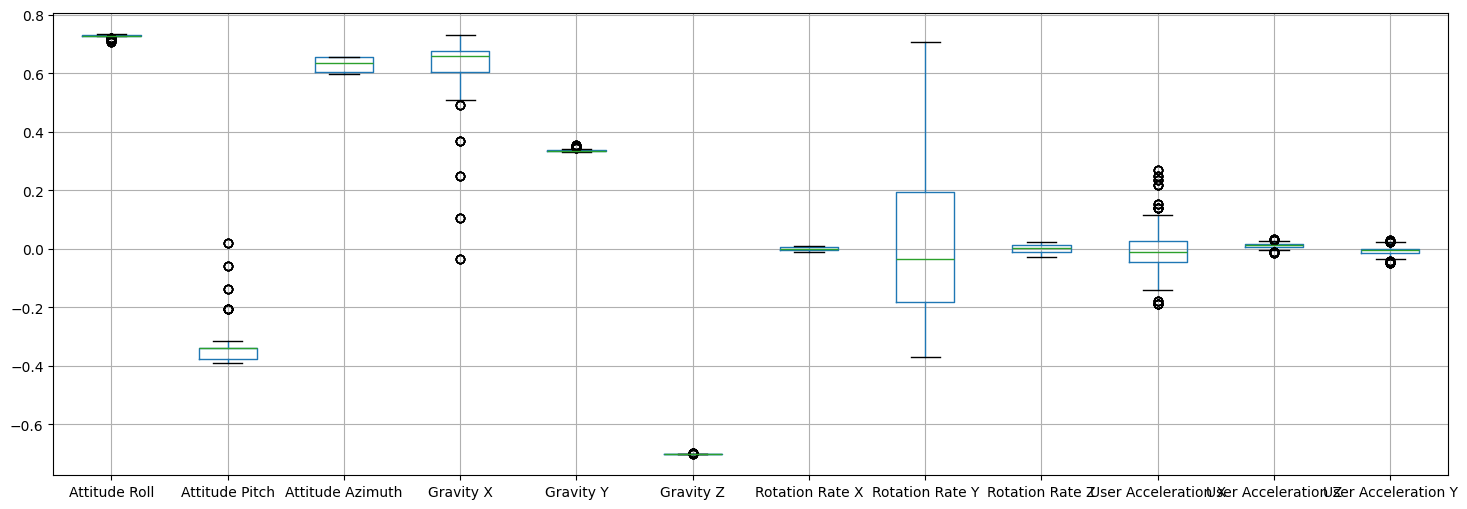

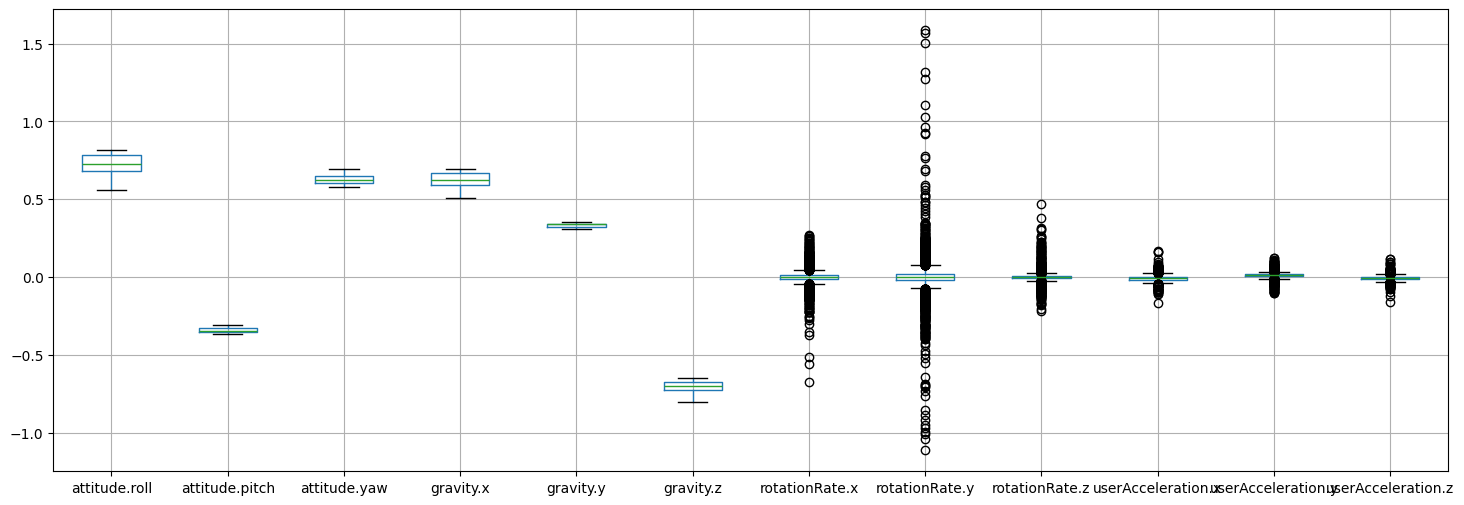

In [181]:
# boxplot
plt.figure(figsize=(18, 6)) 
data_fit.boxplot()
plt.show()

plt.figure(figsize=(18, 6)) 
data_o.boxplot()
plt.show()

In [183]:
# save fitted data
data_fit.to_csv('../data/android_fitted_data/sit/sit_4_fit.csv', sep=',', index=True)